In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
for column in df.columns:
    print(df[column].value_counts())
    print('*'*30)

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
******************************
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
******************************
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64
******************************
2 

In [6]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.drop(['availability','society','area_type'],axis=1,inplace=True)

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   balcony     12711 non-null  float64
 5   price       13320 non-null  float64
dtypes: float64(3), object(3)
memory usage: 624.5+ KB


In [10]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [11]:
df['location']=df['location'].fillna('Whitefield')

In [12]:
df['size']=df['size'].fillna("2 BHK")

In [13]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [14]:
df['balcony']=df['balcony'].fillna(df['balcony'].median())

In [15]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def coverrange(x):
    temp=x.split('-')
    if len(temp)==2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
df['total_sqft']=df['total_sqft'].apply(coverrange)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13320 non-null  float64
 4   balcony     13320 non-null  float64
 5   price       13320 non-null  float64
 6   bhk         13320 non-null  int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 676.5+ KB


In [20]:
df['price_per_sqft']=df['price']*100000 /df['total_sqft']

In [21]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [22]:
df['location'].value_counts()

Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [23]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count=df['location'].value_counts()
location_count_less10=location_count[location_count<=10]
location_count_less10

Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1053, dtype: int64

In [24]:
df['location']=df['location'].apply(lambda x : 'other' if x in location_count_less10 else x )

In [25]:
df.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [26]:
(df['total_sqft']/df["bhk"]).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [27]:
df=df[(df['total_sqft']/df["bhk"])>=300]

In [28]:
df.shape

(12530, 8)

In [29]:
def remove_outliears_sqft(df1):
    df_output=pd.DataFrame()
    for key,subdf in df1.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        
        gen_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
        
    return df_output

df=remove_outliears_sqft(df)


In [30]:
df.shape

(10301, 8)

In [31]:
def remove_bhk_outliers(df1):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={'mean': np.mean(bhk_df.price_per_sqft),
                            'std':np.std(bhk_df.price_per_sqft),
                           'count':bhk_df.shape[0]}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df1.drop(exclude_indices,inplace=True)           

In [32]:
remove_bhk_outliers(df)

In [33]:
df.shape

(7361, 8)

In [34]:
df=df[df.bath<df.bhk+2]

In [35]:
df.drop(['price_per_sqft'],axis=1,inplace=True)

In [36]:
df.location.value_counts()

other                    1136
Whitefield                245
Sarjapur  Road            190
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
HAL 2nd Stage               4
Nagasandra                  4
Banjara Layout              4
2nd Stage Nagarbhavi        4
Marsur                      3
Name: location, Length: 242, dtype: int64

In [37]:
df_loc=pd.get_dummies(df['location'],prefix='loc')
df_loc

,loc_1st Block Jayanagar,loc_1st Phase JP Nagar,loc_2nd Phase Judicial Layout,loc_2nd Stage Nagarbhavi,loc_5th Block Hbr Layout,loc_5th Phase JP Nagar,loc_6th Phase JP Nagar,loc_7th Phase JP Nagar,loc_8th Phase JP Nagar,loc_9th Phase JP Nagar,...,loc_Vishveshwarya Layout,loc_Vishwapriya Layout,loc_Vittasandra,loc_Whitefield,loc_Yelachenahalli,loc_Yelahanka,loc_Yelahanka New Town,loc_Yelenahalli,loc_Yeshwanthpur,loc_other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10293,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df=pd.concat([df,df_loc],axis=1)
df.columns
df.drop(['size','location'],axis=1,inplace=True)

In [39]:
#train_text_split

In [40]:
x = df.drop('price',axis = 1)
y = df['price']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [42]:
#model_training

In [43]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train, y_train)

LinearRegression()

In [45]:
linear_reg_model.intercept_

7944885453.097769

In [46]:
#evaluatin
#Training data
y_pred_train=linear_reg_model.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

r2=r2_score(y_train,y_pred_train)
print('r2:',r2)

mse: 1108.4283297615127
rmse: 33.29306729277903
r2: 0.860746138519582


In [47]:
#Testing data
y_pred_test=linear_reg_model.predict(x_test)

mse=mean_squared_error(y_test,y_pred_test)
print('mse:',mse)

rmse=np.sqrt(mse)
print('rmse:',rmse)

r2=r2_score(y_test,y_pred_test)
print('r2:',r2)

mse: 1233.1565283434234
rmse: 35.11632851457315
r2: 0.8211552141235092


In [48]:
linear_reg_model.score(x_test,y_test)

0.8211552141235092

In [56]:
residual=y_train-y_pred_train
residual

2193     -5.023251
3537    220.779155
7247      2.806115
1439     -4.922426
4097      2.077349
           ...    
3698    -10.997626
2496      0.564266
1281     -4.845599
6000     28.130525
701      17.358257
Name: price, Length: 5825, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

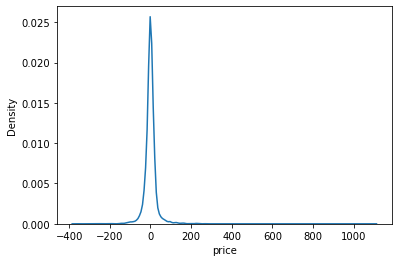

In [57]:
sns.kdeplot(residual)

<AxesSubplot:xlabel='price', ylabel='Density'>

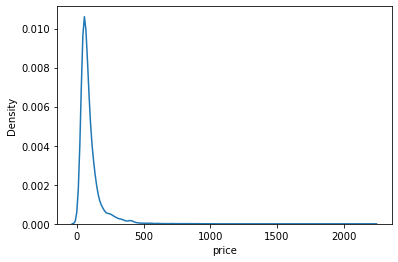

In [58]:
sns.kdeplot(df['price'])

In [59]:
from scipy.stats import shapiro,kstest,normaltest

In [60]:
_,p_val=shapiro(residual)
print("p_val",p_val)
if p_val > 0.05:
    print("Data is normally distributed")
    
else:
    print("Data is not normally Distributed")

p_val 0.0
Data is not normally Distributed


C:\Users\Prerana\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [61]:
_,p_val = kstest(residual,'norm')
print("p_val",p_val)
if p_val > 0.05:
    print("Data is normally distributed")
    
else:
    print("Data is not normally Distributed")

p_val 0.0
Data is not normally Distributed


In [62]:
import scipy.stats as sts
import statsmodels.api as sm

C:\Users\Prerana\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


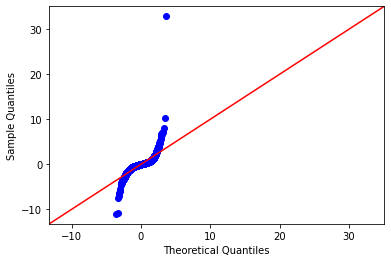

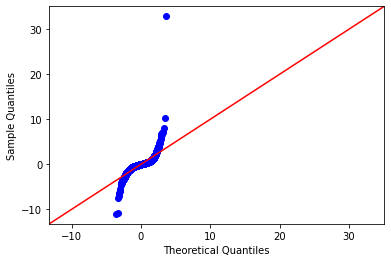

In [63]:
sm.qqplot(residual,line = '45', dist= sts.norm, fit = True)

C:\Users\Prerana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='price'>

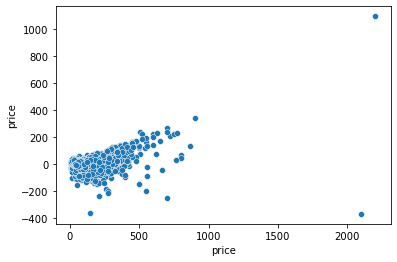

In [64]:
sns.scatterplot(y_train, residual)

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=20)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.88177508, 0.81850252, 0.80529109, 0.87948095, 0.79484538])